In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# needed for dynamic axis
import matplotlib.ticker as ticker
# needed for multicolor line
from matplotlib.collections import LineCollection

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
data = pd.read_csv("data/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding= "latin1")
data.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [4]:
# ELIMINATING USELESS COLUMNS
data = data.drop(labels = ["Unit", "Months Code"], axis=1)

In [5]:
# STANDARIZING COLUMN NAMES

# standard cleaning
data.columns = [column.lower().strip() for column in list(data.columns)]

# eliminating "Y" from year columns and casting them as integers
    ## retrieving years with "y"
years = [year for year in list(data.columns) if year[0] == "y"]
    ## creating fixed years
f_years = [year.replace("y","") for year in years]
    ## merging lists
mapped_years = zip(years, f_years)
    ## dictionary comprehension for creating new_cols dictionary. This is the argument of the name method
new_cols = {key:int(value) for key,value in mapped_years}
    ## executing rename
data = data.rename(columns = new_cols)
    ## cleaining temp variables
del years
del f_years
del mapped_years
del new_cols
data.head()

,area code,area,months,element code,element,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2,Afghanistan,January,7271,Temperature change,0.777,0.062,2.744,-5.232,1.868,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,January,6078,Standard Deviation,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,February,7271,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,February,6078,Standard Deviation,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,March,7271,Temperature change,0.516,1.336,0.403,1.659,-0.909,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [6]:
# STANDARIZING COUNTRY NAMES
    ## extracting countries with paranthesis in their name and creating df
country_df = data["area"].str.extract("(?P<country>.*)(?P<other>\(.*\))").dropna()
    ## eliminating annoying whitespace
country_df["country"] = country_df["country"].str.strip()
    ## extracting indexes 
indexes = (index for index in country_df.index)
    ## replacing indicated indeces in parent df
for index in indexes:
    data.loc[index,"area"] = country_df.loc[index,"country"]

In [7]:
# CLEANING MONTHS NAMES
    ## Cleaning Quarters with encoding difficulties
data["months"] = data["months"].str.replace("\x96", "-")

In [8]:
# creating sliced country dataframe
    ## instantiating limiting variables
country = "Nicaragua"
element = "Temperature change"
month = "January"
    ## filtering
country_data = data[(data["area"] == country) & (data["element"] == element) & (data["months"] == month)]
    ## transposing and deleting unnecesary data
country_data = country_data.T
country_data = country_data.drop(['area code','area','months','element code','element'], axis=0)
    ## reassigning column and adjusting type again
country_data.columns = [month]
country_data = country_data.astype("float")
    ## creating color map of result
country_data["color"] = np.where(country_data[month] > 0, "red", "blue")
    ## grouping by color as per https://stackoverflow.com/questions/33560789/seaborn-or-matplotlib-line-chart-line-color-depending-on-variable
color_country_data = country_data

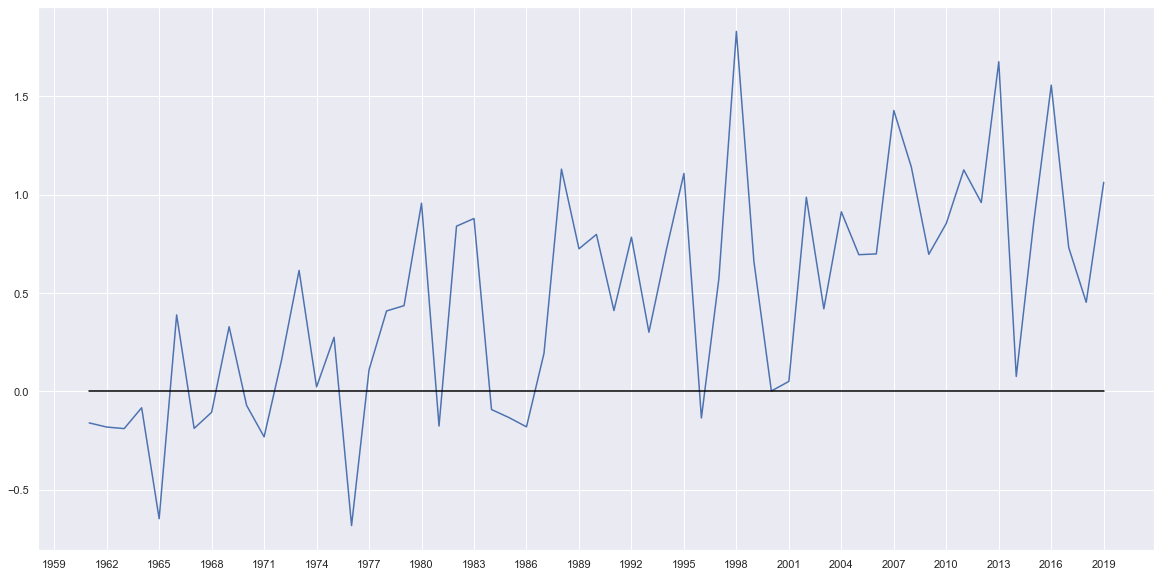

In [9]:
# setting figsize
plt.figure(figsize=(20,10))

# creating general line plot
plt.plot(country_data.index, country_data[month])
plt.plot(country_data.index, [0]*country_data.index.shape[0], color="black")

# setting tick range dynamically
    # deprecated solution
    # ax = plt.gca()
    # ax.set_xticks("lowerbound", "upperbound", "step"))
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

In [10]:
points = np.array([list(color_country_data[month].index), list(color_country_data[month].values)]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

(-0.682, 1.83)

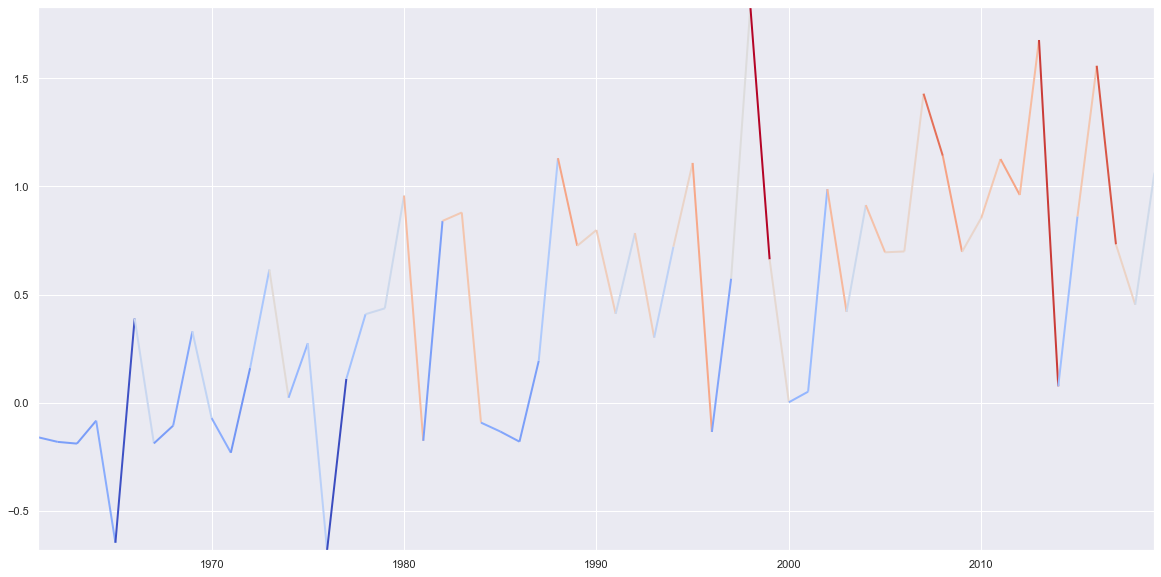

In [18]:
fig = plt.figure(figsize=(20,10))
lc = LineCollection(segments = segments, cmap="coolwarm")
lc.set_array(color_country_data[month].values)
lc.set_linewidth(2)

ax = plt.gca()
line = ax.add_collection(lc)
ax.set_xlim(xmin = min(color_country_data[month].index), xmax = max(color_country_data[month].index))
ax.set_ylim(ymin = min(color_country_data[month].values), ymax=max(color_country_data[month].values))